## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path("Resources/bitstamp.csv"),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True
)


### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head(), bitstamp.tail()

(                         Open      High       Low      Close  BTC Volume  \
 Timestamp                                                                  
 2018-01-01 00:00:00  13681.04  13681.04  13637.93  $13646.48    3.334553   
 2018-01-01 00:01:00  13646.48  13658.75  13610.18  $13658.75    2.663188   
 2018-01-01 00:02:00  13616.93  13616.93  13610.06  $13610.22    0.084653   
 2018-01-01 00:03:00  13610.27  13639.09  13610.27  $13639.09    7.182986   
 2018-01-01 00:04:00  13635.35  13636.35  13620.00   $13620.0    1.069665   
 
                        USD Volume  Weighted Price  
 Timestamp                                          
 2018-01-01 00:00:00  45482.128785    13639.647479  
 2018-01-01 00:01:00  36361.390888    13653.332816  
 2018-01-01 00:02:00   1152.144036    13610.136247  
 2018-01-01 00:03:00  97856.416478    13623.361128  
 2018-01-01 00:04:00  14582.660932    13632.923329  ,
                         Open     High      Low     Close  BTC Volume  \
 Timestamp    

### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters


coinbase = pd.read_csv(
    Path("Resources/coinbase.csv"),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True
)

In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head(),coinbase.tail()

(                         Open      High       Low      Close  BTC Volume  \
 Timestamp                                                                  
 2018-01-01 00:00:00  13620.00  13620.00  13608.49  $13608.49   20.812754   
 2018-01-01 00:01:00  13607.14  13607.14  13601.66  $13601.66   13.474359   
 2018-01-01 00:02:00  13601.44  13601.44  13580.00   $13580.0   11.536360   
 2018-01-01 00:03:00  13587.31  13587.31  13542.70  $13550.34   16.328039   
 2018-01-01 00:04:00  13550.34  13585.95  13550.34  $13583.44    9.955364   
 
                        USD Volume  Weighted Price  
 Timestamp                                          
 2018-01-01 00:00:00  283451.08537    13619.105106  
 2018-01-01 00:01:00  183283.97801    13602.426919  
 2018-01-01 00:02:00  156789.19686    13590.872506  
 2018-01-01 00:03:00  221413.64182    13560.332806  
 2018-01-01 00:04:00  135141.26944    13574.719401  ,
                         Open     High      Low     Close  BTC Volume  \
 Timestamp    

## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp.isnull().sum()

Open              473
High              473
Low               473
Close               0
BTC Volume        473
USD Volume        473
Weighted Price    473
dtype: int64

In [7]:
bitstamp = bitstamp.dropna().copy()

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [8]:
# Use the str.replace function to remove the dollar sign, $
bitstamp["Close"] = bitstamp["Close"].str.replace("$", "")

c:\ProgramData\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


### Step 3: Convert the data type of the Close column to a `float`.

In [9]:
# Convert the Close data type to a float
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [10]:
bitstamp["Close"] = bitstamp["Close"].astype("float")

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [11]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()

0

In [12]:
 # final data review for bitstamp
bitstamp.isnull().sum(), bitstamp.dtypes, bitstamp.duplicated().sum()

(Open              0
 High              0
 Low               0
 Close             0
 BTC Volume        0
 USD Volume        0
 Weighted Price    0
 dtype: int64,
 Open              float64
 High              float64
 Low               float64
 Close             float64
 BTC Volume        float64
 USD Volume        float64
 Weighted Price    float64
 dtype: object,
 0)

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [13]:
# Repeat Steps 1–4 for the coinbase DataFrame

# Step 1 - replace or drop NaN's

coinbase.isnull().sum()

Open              218
High              218
Low               218
Close               0
BTC Volume        218
USD Volume        218
Weighted Price    218
dtype: int64

In [14]:
coinbase = coinbase.dropna().copy()

In [15]:
# Step 2 - remove the "$"s

coinbase["Close"] = coinbase["Close"].str.replace("$", "")

c:\ProgramData\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
# Step 3 - convert 'Close' column data to 'float' 

coinbase["Close"] = coinbase["Close"].astype("float")

In [17]:
# Step 4 - remove any duplicates

coinbase.duplicated().sum()

0

In [18]:
# final data review for coinbase 
coinbase.isnull().sum(), coinbase.dtypes, coinbase.duplicated().sum()

(Open              0
 High              0
 Low               0
 Close             0
 BTC Volume        0
 USD Volume        0
 Weighted Price    0
 dtype: int64,
 Open              float64
 High              float64
 Low               float64
 Close             float64
 BTC Volume        float64
 USD Volume        float64
 Weighted Price    float64
 dtype: object,
 0)

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [19]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
# shortened name of df named in starter code to 'btsp'

btsp = bitstamp_sliced = bitstamp.loc[:,['Close']]

# Review the first five rows of the DataFrame
btsp.head()

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [20]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
# shortened name of df named in starter code to 'coin'

coin = coinbase_sliced = coinbase.loc[:,['Close']]

# Review the first five rows of the DataFrame
coin.head()

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [21]:
# Generate the summary statistics for the bitstamp DataFrame
btsp.describe()

,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


In [22]:
# Generate the summary statistics for the coinbase DataFrame
coin.describe()

,Close
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


<AxesSubplot:title={'center':'Bitstamp Exchange: 2018 - Q1'}, xlabel='Timestamp', ylabel='BTC Price (USD$)'>

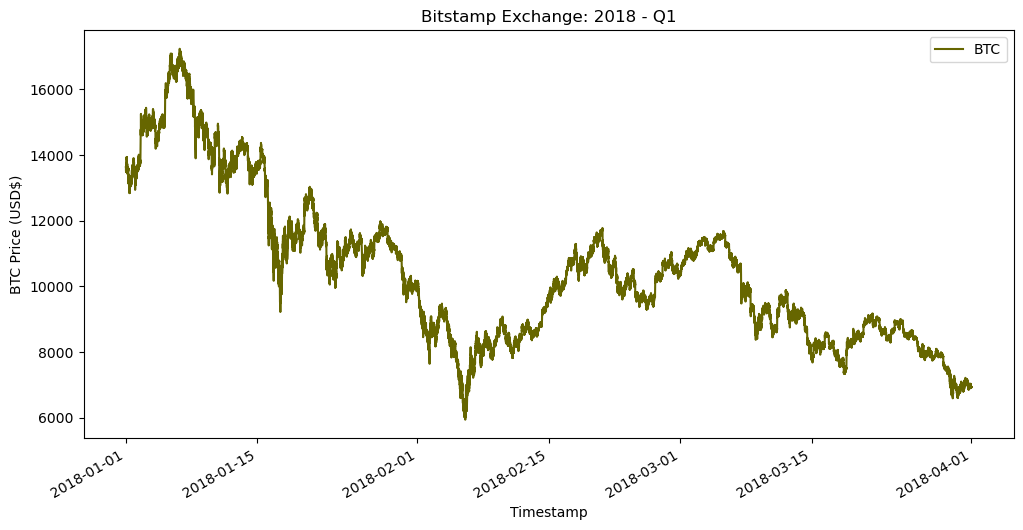

In [23]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization

# found a 'web safe' color template # from https://www.colorhexa.com/web-safe-colors

btsp['Close'].plot(
    figsize=(12,6),
    legend=True,
    label='BTC',
    ylabel="BTC Price (USD$)",
    title="Bitstamp Exchange: 2018 - Q1",
    color="#666600" 
) 

<AxesSubplot:title={'center':'Coinbase Excgange: 2018 - Q1'}, xlabel='Timestamp', ylabel='BTC Price (USD$)'>

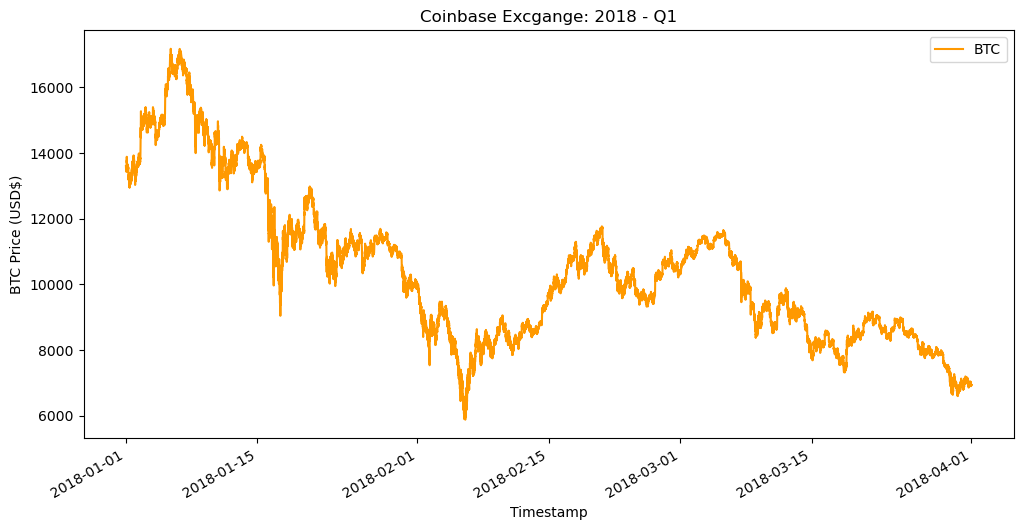

In [24]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization

# set color to '#ff9900' for visibility alone and good contrast to 'dark green' # https://www.colorhexa.com/web-safe-colors

coin['Close'].plot(
    figsize=(12,6), 
    legend=True,
    label='BTC',
    ylabel="BTC Price (USD$)", 
    title="Coinbase Excgange: 2018 - Q1",
    color="#ff9900"
)

<AxesSubplot:title={'center':'BTC Arbitrage Opportunities: Q1 2018 on BTSP and COIN'}, xlabel='Timestamp', ylabel='BTC Price (USD$)'>

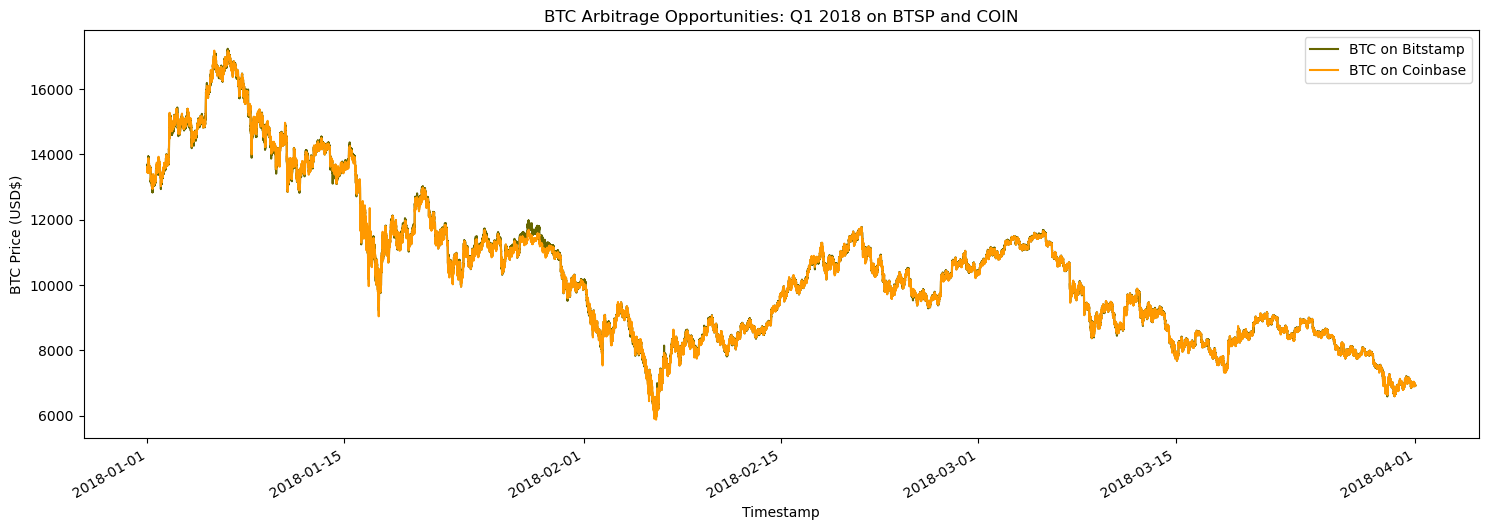

In [25]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label

ax=btsp['Close'].plot(
    figsize=(18,6),
    legend=True,
    ylabel="BTC Price (USD$)",
    title="BTC Arbitrage Opportunities: Q1 2018 on BTSP and COIN",
    color="#666600",
    label="BTC on Bitstamp"
)
coin['Close'].plot(
    ax=ax,
    legend=True,
    color="#ff9900", 
    label="BTC on Coinbase"
)

<AxesSubplot:title={'center':'BTC Arbitrage Opportunities (early window): BTSP and COIN'}, xlabel='Timestamp', ylabel='BTC Price (USD$)'>

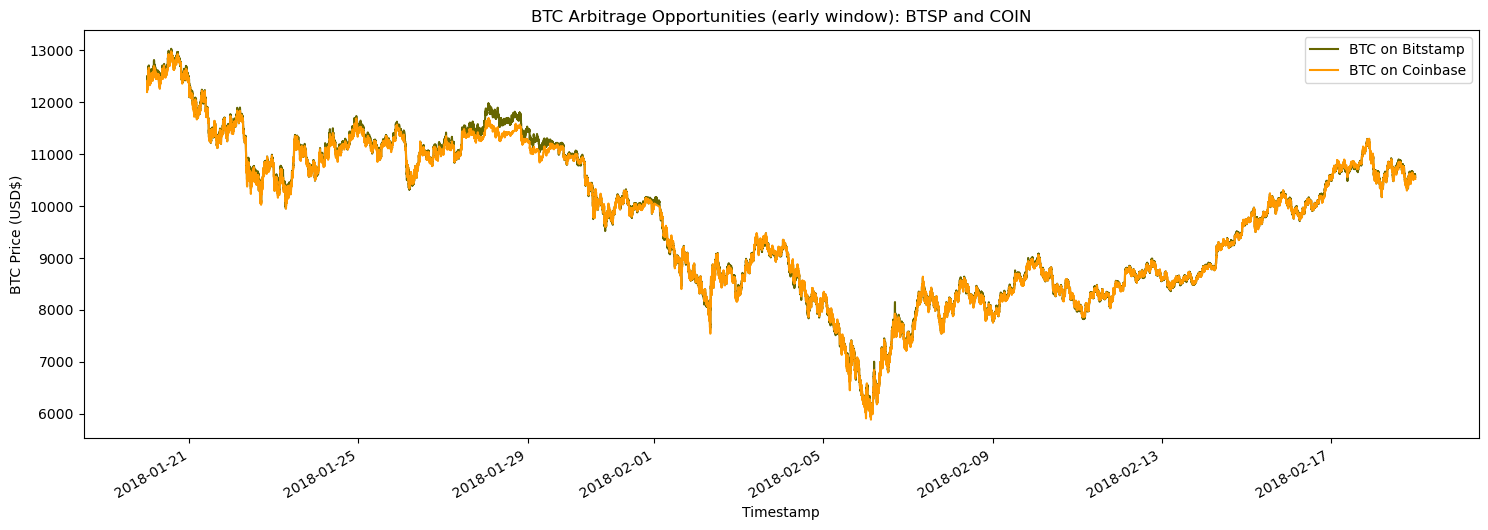

In [26]:
### EARLY WINDOW ###
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label

bitstamp['Close'].loc['2018-01-20' : '2018-02-18'].plot(
    legend=True,
    figsize=(18,6),
    ylabel="BTC Price (USD$)",
    title="BTC Arbitrage Opportunities (early window): BTSP and COIN",
    color="#666600",
    label="BTC on Bitstamp"
)
coinbase['Close'].loc['2018-01-20' : '2018-02-18'].plot(
    legend=True,
    color="#ff9900",
    label="BTC on Coinbase"
)

<AxesSubplot:title={'center':'BTC Arbitrage Opportunities (early window): BTSP and COIN'}, xlabel='Timestamp', ylabel='BTC Price (USD$)'>

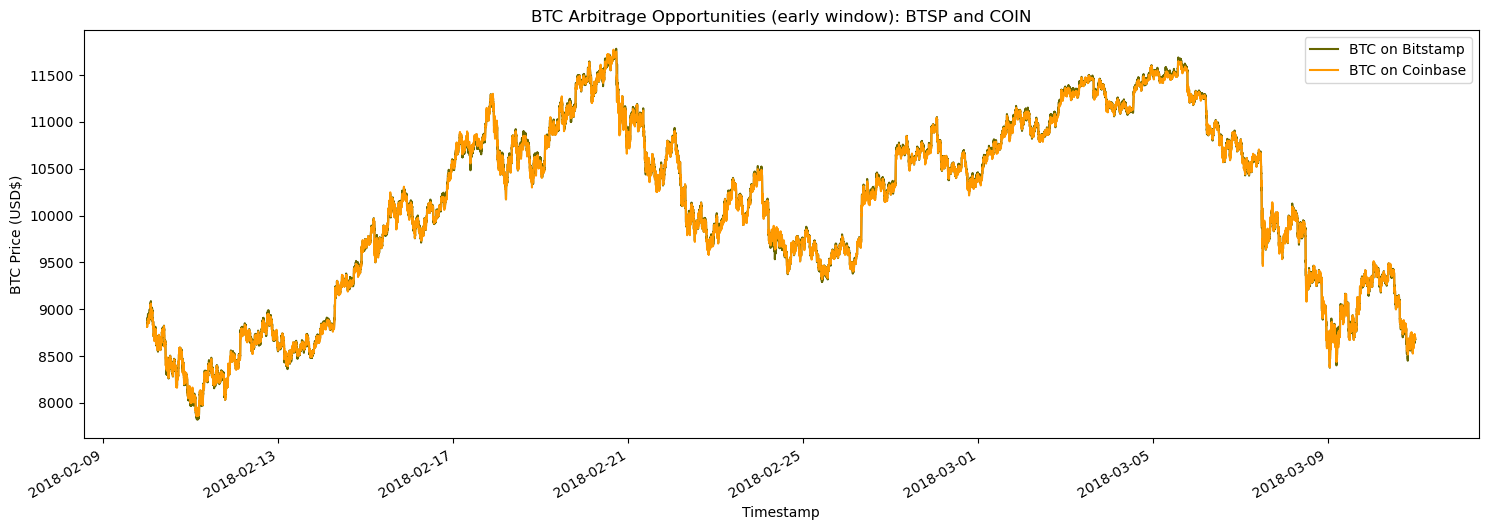

In [27]:
### MIDDLE WINDOW ###
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label

bitstamp['Close'].loc['2018-02-10' : '2018-03-10'].plot(
    legend=True,
    figsize=(18,6),
    ylabel="BTC Price (USD$)",
    title="BTC Arbitrage Opportunities (early window): BTSP and COIN",
    color="#666600",
    label="BTC on Bitstamp")

coinbase['Close'].loc['2018-02-10' : '2018-03-10'].plot(
    legend=True,
    color="#ff9900",
    label="BTC on Coinbase"
)

<AxesSubplot:title={'center':'BTC Arbitrage Opportunities (later window): BTSP and COIN'}, xlabel='Timestamp', ylabel='Price (USD$)'>

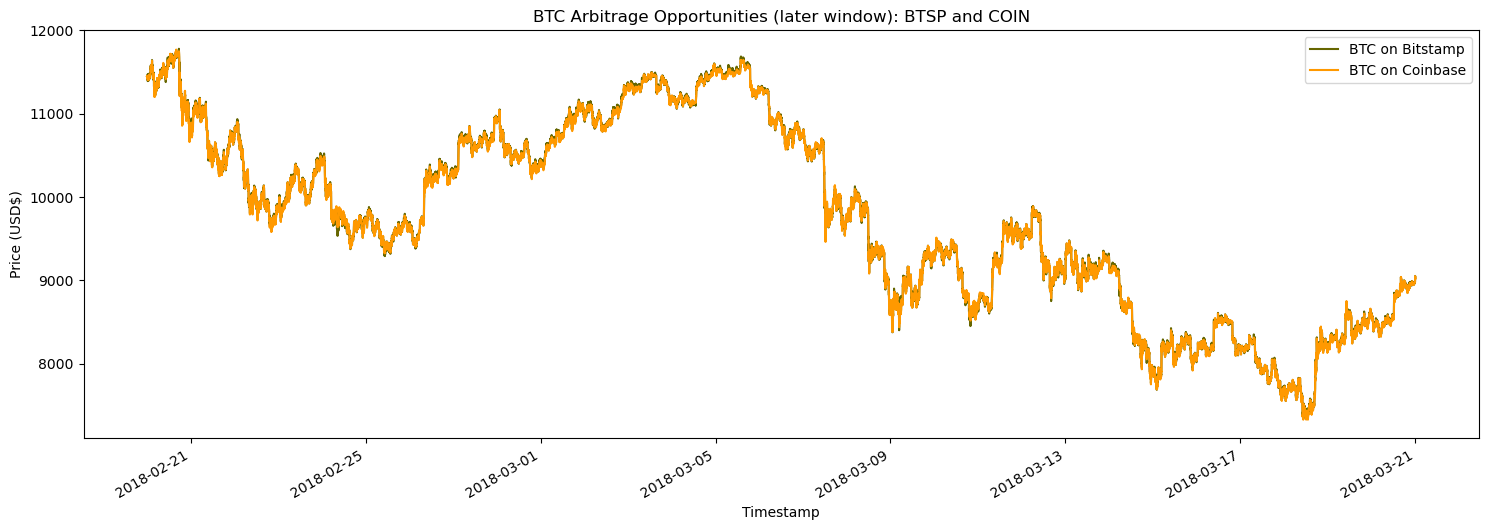

In [28]:
 ### LATER WINDOW ###
# Using the loc and plot functions, create an overlay plot that visualizes
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 

bitstamp['Close'].loc['2018-02-20' : '2018-03-20'].plot(
    legend=True,
    figsize=(18,6),
    ylabel="BTC Price (USD$)",
    title="BTC Arbitrage Opportunities (later window): BTSP and COIN",
    color="#666600",
    label="BTC on Bitstamp")

coinbase['Close'].loc['2018-02-20' : '2018-03-20'].plot(
    legend=True,
    figsize=(18,6),
    ylabel="Price (USD$)",
    color="#ff9900",
    label="BTC on Coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** Yes.  At the beginning of Q1 2018, BTC traded in close range with little spread.  By the end of Jan. 2018, BTC price showed a significantly  wide spread that generated an arbitrage opportunity based on the visual alone.  Then in Feb. to March 2018, the spread appears to maintain a narrow spread.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

In [29]:
# 1. Select three dates to evaluate for arbitrage profitability ### doing this first makes it easier to follow 'DRY' coding ###

### Jan. 28 - early date #### BTSP > COIN
early_btsp = btsp.loc[ 
    "2018-01-28":"2018-01-28"
]
early_coin = coin.loc[
    "2018-01-28":"2018-01-28"
]

### Feb. 19 - middle date #### BTSP > COIN
mid_btsp = btsp.loc[
    "2018-02-19":"2018-02-19"
]
mid_coin = coin.loc[
    "2018-02-19":"2018-02-19"
]

### Mar. 14 - late date #### BTSP > COIN
late_btsp = btsp.loc[
    "2018-03-14":"2018-03-14"
]
late_coin = coin.loc[
    "2018-03-14":"2018-03-14"
]

<AxesSubplot:title={'center':'Early BTC price spread January 28, 2018: BTSP and COIN'}, xlabel='Timestamp', ylabel='Price (USD$)'>

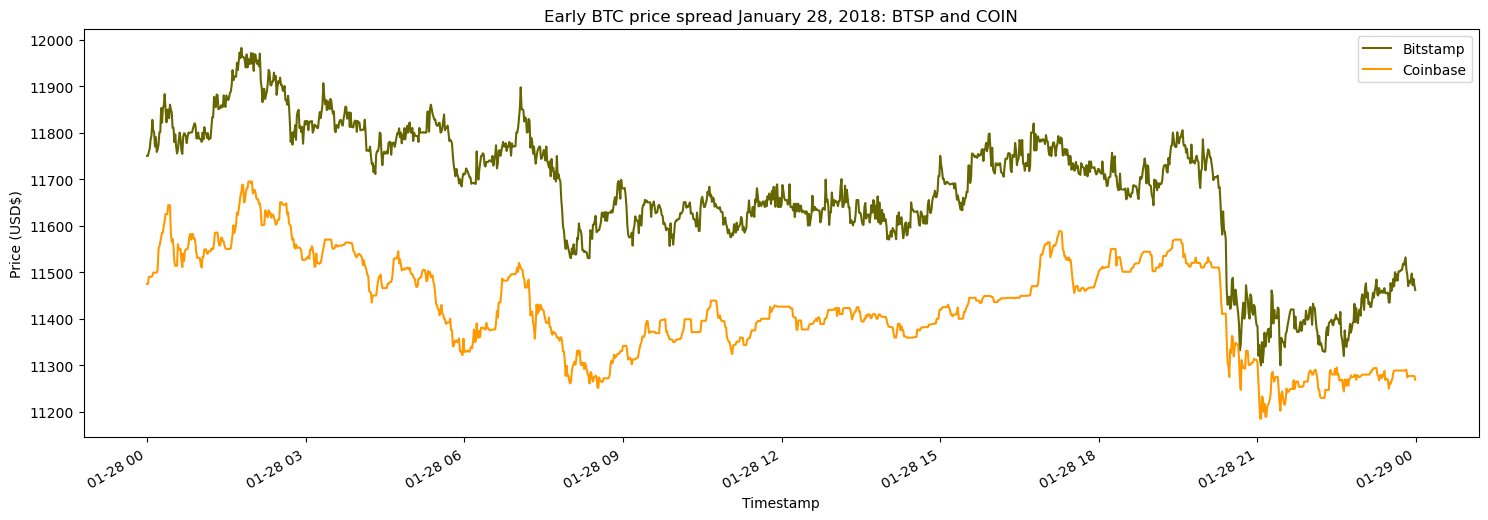

In [30]:
### EARLY WINDOW SAMPLE DATE ###

# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 

ax=early_btsp['Close'].plot(
    figsize=(18,6),
    legend=True, 
    label="Bitstamp",
    ylabel="Price (USD$)",
    title="Early BTC price spread January 28, 2018: BTSP and COIN",
    color="#666600"
)

early_coin['Close'].plot(
    ax=ax,
    legend=True,
    label="Coinbase",
    color="#ff9900"
)

In [31]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices

# BTSP > COIN - for BTC
arb_sprd_0128 = early_btsp['Close'] - early_coin['Close']

# Generate summary statistics for the early DataFrame
arb_sprd_0128.describe()


count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Early BTC Arbitrage Spread: Jan. 28, 2018'}>

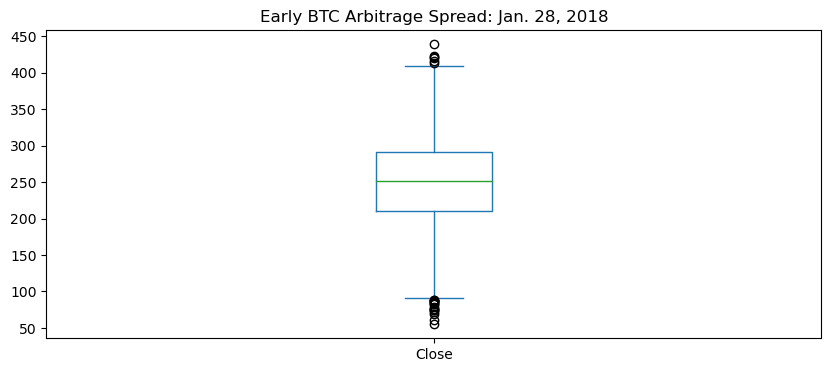

In [32]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arb_sprd_0128.plot(
    kind="box",
    figsize=(10,4),
    title="Early BTC Arbitrage Spread: Jan. 28, 2018"
)

<AxesSubplot:title={'center':'Middle BTC price spread - February 19, 2018: BTSP and COIN'}, xlabel='Timestamp', ylabel='BTC Price (USD$)'>

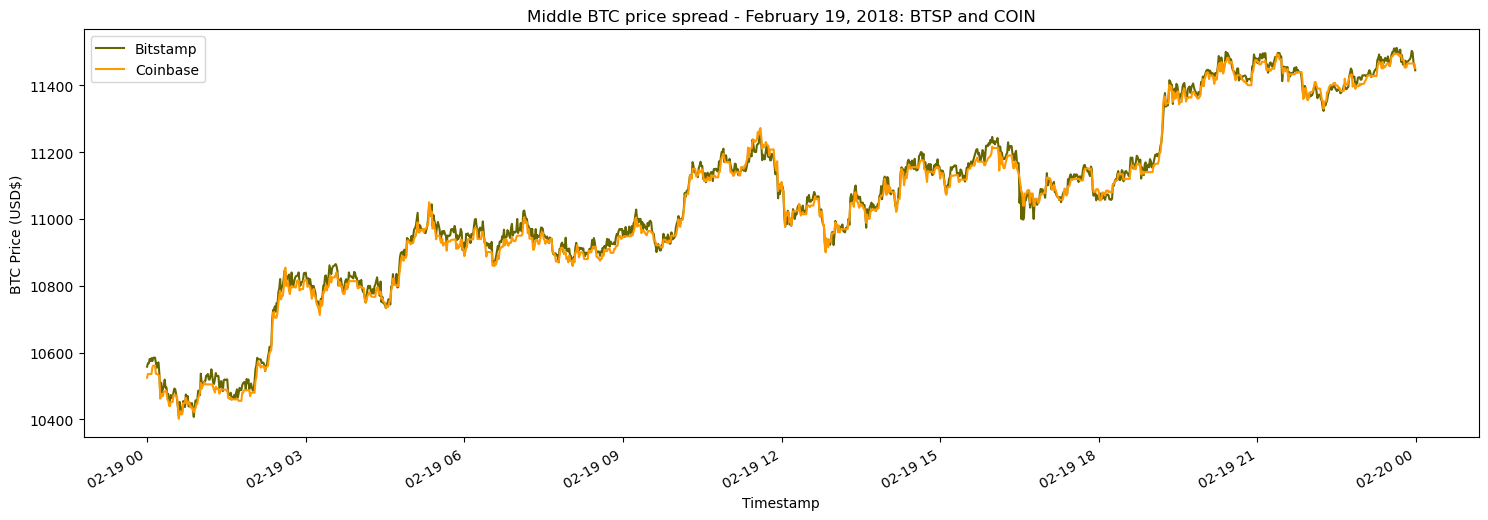

In [33]:
### MIDDLE WINDOW SAMPLE DATE ###
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 

ax=mid_btsp['Close'].plot(
    legend=True,
    label="Bitstamp",
    figsize=(18,6),
    ylabel="BTC Price (USD$)",
    title="Middle BTC price spread - February 19, 2018: BTSP and COIN",
    color="#666600"
)                      
mid_coin['Close'].plot(
    ax=ax,
    legend=True,
    label="Coinbase",
    color="#ff9900"
)

In [34]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices

# BTSP > COIN
arb_sprd_0219 = mid_btsp['Close'] - mid_coin['Close']

# Generate summary statistics 
arb_sprd_0219.describe()

count    1438.000000
mean       10.350612
std        15.656903
min       -81.000000
25%         0.965000
50%        11.185000
75%        21.007500
max        49.910000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Middle BTC Arbitrage Spread: Feb. 19, 2018'}>

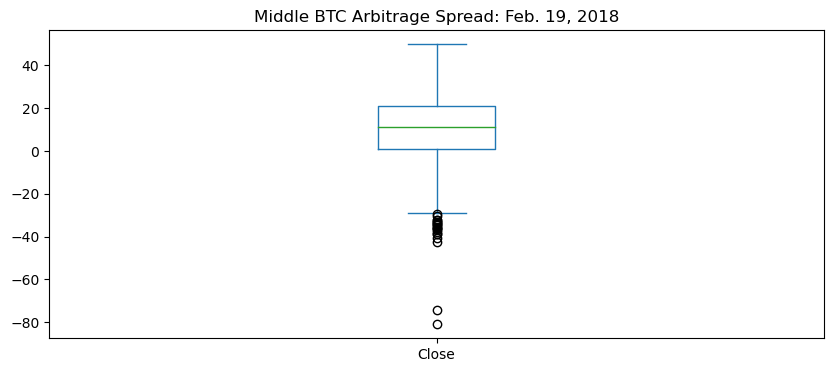

In [35]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arb_sprd_0219.plot(
    kind="box",
    legend=True,
    figsize=(10,4),
    title="Middle BTC Arbitrage Spread: Feb. 19, 2018"
)

<AxesSubplot:title={'center':'Late BTC price spread - March 14, 2018: BTSP and COIN'}, xlabel='Timestamp', ylabel='Price (USD$)'>

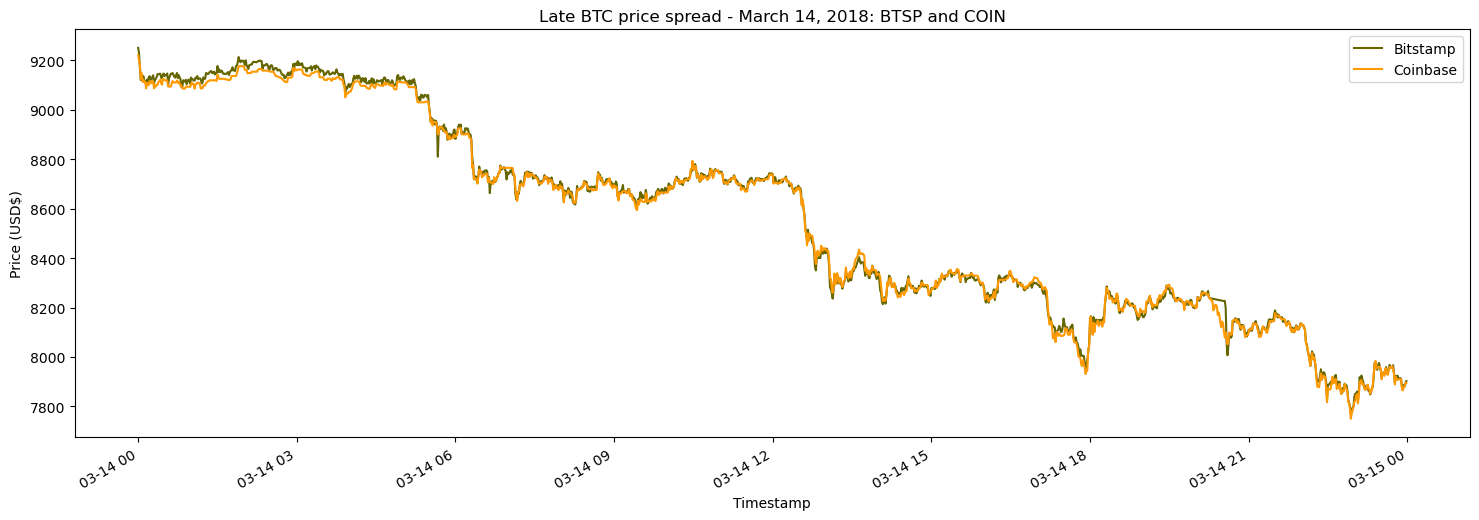

In [36]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 

ax=late_btsp['Close'].plot(
    legend=True,
    label="Bitstamp",
    figsize=(18,6),
    ylabel="Price (USD$)",
    title="Late BTC price spread - March 14, 2018: BTSP and COIN",
    color="#666600")
                      
late_coin['Close'].plot(
    ax=ax,
    legend=True,
    label="Coinbase",
    color="#ff9900")

In [37]:
# Using the date in the later third of df that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices

# BTSP > COIN
arb_sprd_0314 = late_btsp['Close'] - late_coin['Close']

# Generate summary statistics 
arb_sprd_0314.describe()

count    1425.000000
mean        6.731404
std        16.322187
min       -90.010000
25%        -2.910000
50%         6.000000
75%        16.600000
max       147.650000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Late BTC Arbitrage Spread: Mar. 14, 2018'}>

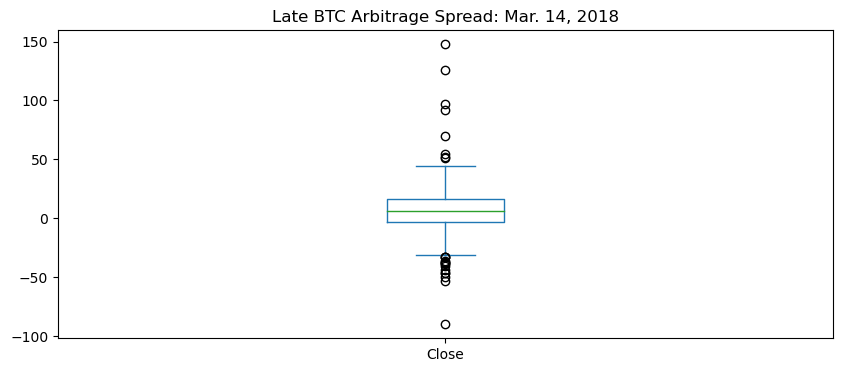

In [38]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arb_sprd_0314.plot(
    kind="box",
    legend=True,
    figsize=(10,4),
    title="Late BTC Arbitrage Spread: Mar. 14, 2018"
)

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arb_sprd DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arb_sprd DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [39]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one

# Use a conditional statement to generate the summary statistics for each arb_sprd DataFrame
arb_sprd_0128[arb_sprd_0128 > 0].describe(),arb_sprd_0219[arb_sprd_0219 > 0].describe(),arb_sprd_0314[arb_sprd_0314 > 0].describe()


(count    1436.000000
 mean      247.552326
 std        68.343472
 min        55.030000
 25%       210.022500
 50%       251.180000
 75%       290.925000
 max       439.010000
 Name: Close, dtype: float64,
 count    1111.000000
 mean       16.748497
 std        10.221142
 min         0.010000
 25%         8.345000
 50%        15.930000
 75%        24.020000
 max        49.910000
 Name: Close, dtype: float64,
 count    956.000000
 mean      14.774121
 std       12.422690
 min        0.010000
 25%        5.912500
 50%       11.935000
 75%       21.350000
 max      147.650000
 Name: Close, dtype: float64)

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [40]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).

# spread_return_0128 = arb_sprd_0128[arb_sprd_0128>0] / early_coin['Close']
spread_return_0128 = arb_sprd_0128[arb_sprd_0128>0] / early_coin['Close']

# spread_return_0219 = arb_sprd_0219[arb_sprd_0219>0] / mid_coin['Close']
spread_return_0219 = arb_sprd_0219[arb_sprd_0219>0] / mid_coin['Close']

# spread_return_0314 = arb_sprd_0314[arb_sprd_0314>0] / late_coin['Close']
spread_return_0314 = arb_sprd_0314[arb_sprd_0314>0] / late_coin['Close']


# Review the spread return DataFrame
display(spread_return_0128.head(10), spread_return_0128.tail(10))
display(spread_return_0219.head(10), spread_return_0219.tail(10))
display(spread_return_0314.head(10), spread_return_0314.tail(10))

Timestamp
2018-01-28 00:00:00    0.023999
2018-01-28 00:01:00    0.023965
2018-01-28 00:02:00    0.023392
2018-01-28 00:03:00    0.023936
2018-01-28 00:04:00    0.025610
2018-01-28 00:05:00    0.026465
2018-01-28 00:06:00    0.029151
2018-01-28 00:07:00    0.026618
2018-01-28 00:08:00    0.026180
2018-01-28 00:09:00    0.023577
Name: Close, dtype: float64

Timestamp
2018-01-28 23:50:00    0.019470
2018-01-28 23:51:00    0.017116
2018-01-28 23:52:00    0.018171
2018-01-28 23:53:00    0.017737
2018-01-28 23:54:00    0.018179
2018-01-28 23:55:00    0.019518
2018-01-28 23:56:00    0.017302
2018-01-28 23:57:00    0.018510
2018-01-28 23:58:00    0.017303
2018-01-28 23:59:00    0.017094
Name: Close, dtype: float64

Timestamp
2018-02-19 00:00:00    0.003135
2018-02-19 00:01:00    0.003063
2018-02-19 00:02:00    0.003072
2018-02-19 00:03:00    0.004280
2018-02-19 00:04:00    0.003687
2018-02-19 00:05:00    0.004507
2018-02-19 00:06:00    0.001880
2018-02-19 00:07:00    0.002220
2018-02-19 00:08:00    0.002285
2018-02-19 00:09:00    0.002287
Name: Close, dtype: float64

Timestamp
2018-02-19 23:50:00    0.000338
2018-02-19 23:51:00    0.000645
2018-02-19 23:52:00    0.000895
2018-02-19 23:53:00    0.001134
2018-02-19 23:54:00    0.001737
2018-02-19 23:55:00    0.003302
2018-02-19 23:56:00    0.002906
2018-02-19 23:57:00    0.000357
2018-02-19 23:58:00         NaN
2018-02-19 23:59:00         NaN
Name: Close, dtype: float64

Timestamp
2018-03-14 00:00:00    0.003254
2018-03-14 00:01:00    0.003127
2018-03-14 00:02:00         NaN
2018-03-14 00:03:00         NaN
2018-03-14 00:04:00         NaN
2018-03-14 00:05:00    0.001958
2018-03-14 00:06:00    0.001597
2018-03-14 00:07:00    0.000329
2018-03-14 00:08:00    0.000262
2018-03-14 00:09:00    0.001645
Name: Close, dtype: float64

Timestamp
2018-03-14 23:50:00    0.000376
2018-03-14 23:51:00    0.000100
2018-03-14 23:52:00    0.000619
2018-03-14 23:53:00    0.000104
2018-03-14 23:54:00    0.001398
2018-03-14 23:55:00    0.001116
2018-03-14 23:56:00    0.000893
2018-03-14 23:57:00    0.000288
2018-03-14 23:58:00         NaN
2018-03-14 23:59:00    0.000955
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [41]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trading_0128 = spread_return_0128[spread_return_0128 > .01]
profitable_trading_0219 = spread_return_0219[spread_return_0219 > .01]
profitable_trading_0314 = spread_return_0314[spread_return_0314 > .01]

# Review the first five profitable trades
profitable_trading_0128.head(), profitable_trading_0219.head(), profitable_trading_0314.head()

(Timestamp
 2018-01-28 00:00:00    0.023999
 2018-01-28 00:01:00    0.023965
 2018-01-28 00:02:00    0.023392
 2018-01-28 00:03:00    0.023936
 2018-01-28 00:04:00    0.025610
 Name: Close, dtype: float64,
 Series([], Name: Close, dtype: float64),
 Timestamp
 2018-03-14 20:31:00    0.011296
 2018-03-14 20:32:00    0.015508
 2018-03-14 20:33:00    0.018276
 2018-03-14 20:34:00    0.012002
 Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [42]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trading_0128.describe(), profitable_trading_0219.describe(), profitable_trading_0314.describe()

(count    1378.000000
 mean        0.022201
 std         0.005421
 min         0.010087
 25%         0.019016
 50%         0.022191
 75%         0.025413
 max         0.038510
 Name: Close, dtype: float64,
 count    0.0
 mean     NaN
 std      NaN
 min      NaN
 25%      NaN
 50%      NaN
 75%      NaN
 max      NaN
 Name: Close, dtype: float64,
 count    4.000000
 mean     0.014271
 std      0.003244
 min      0.011296
 25%      0.011826
 50%      0.013755
 75%      0.016200
 max      0.018276
 Name: Close, dtype: float64)

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [43]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased

profit_0128 = profitable_trading_0128 * early_coin
profit_0219 = profitable_trading_0219 * mid_coin
profit_0314 = profitable_trading_0314 * late_coin

# Drop any missing values from the profit DataFrame
profit_0128 = profitable_trading_0128.dropna().copy()
profit_0219 = profitable_trading_0219.dropna().copy()
profit_0314 = profitable_trading_0314.dropna().copy()


# View the early profit DataFrame
profit_0128.head(), profit_0219.head(),  profit_0314.head()


(Timestamp
 2018-01-28 00:00:00    0.023999
 2018-01-28 00:01:00    0.023965
 2018-01-28 00:02:00    0.023392
 2018-01-28 00:03:00    0.023936
 2018-01-28 00:04:00    0.025610
 Name: Close, dtype: float64,
 Series([], Name: Close, dtype: float64),
 Timestamp
 2018-03-14 20:31:00    0.011296
 2018-03-14 20:32:00    0.015508
 2018-03-14 20:33:00    0.018276
 2018-03-14 20:34:00    0.012002
 Name: Close, dtype: float64)

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [44]:
#  Generate the summary statistics for the early profit per trade DataFrame

profit_0128.describe(), profit_0219.describe(), profit_0314.describe()

(count    1378.000000
 mean        0.022201
 std         0.005421
 min         0.010087
 25%         0.019016
 50%         0.022191
 75%         0.025413
 max         0.038510
 Name: Close, dtype: float64,
 count    0.0
 mean     NaN
 std      NaN
 min      NaN
 25%      NaN
 50%      NaN
 75%      NaN
 max      NaN
 Name: Close, dtype: float64,
 count    4.000000
 mean     0.014271
 std      0.003244
 min      0.011296
 25%      0.011826
 50%      0.013755
 75%      0.016200
 max      0.018276
 Name: Close, dtype: float64)

<AxesSubplot:title={'center':'Potential Profit Per Trade - Early Sample Date'}, xlabel='Timestamp', ylabel='Profit (USD$)'>

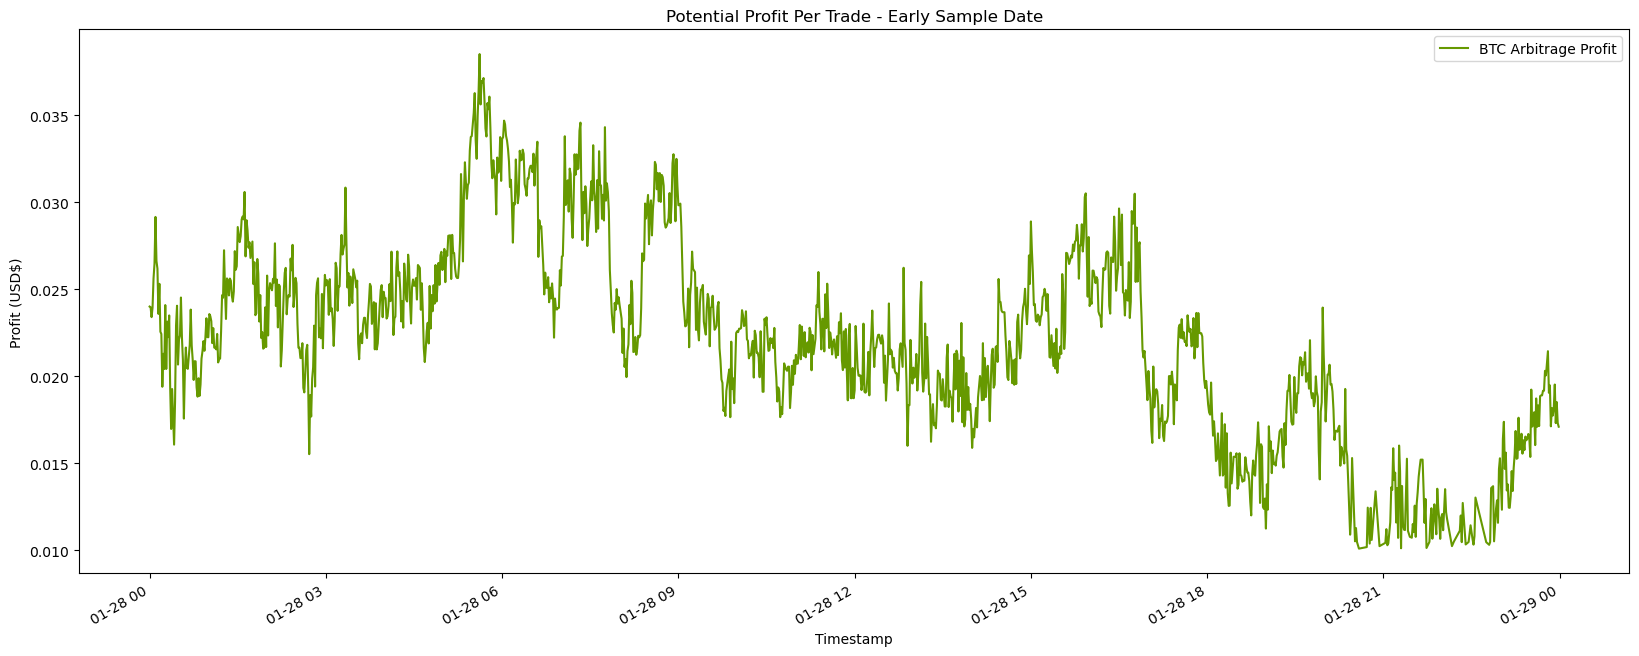

In [45]:
# Plot the results for the early profit per trade DataFrame
profit_0128.plot(
    figsize=(20, 8),
    legend=True,
    label="BTC Arbitrage Profit",
    ylabel="Profit (USD$)",
    title="Potential Profit Per Trade - Early Sample Date",
    color="#669900")

<AxesSubplot:title={'center':'Potential Profit Per Trade - Middle Sample Date'}, xlabel='Timestamp', ylabel='Profit (USD$)'>

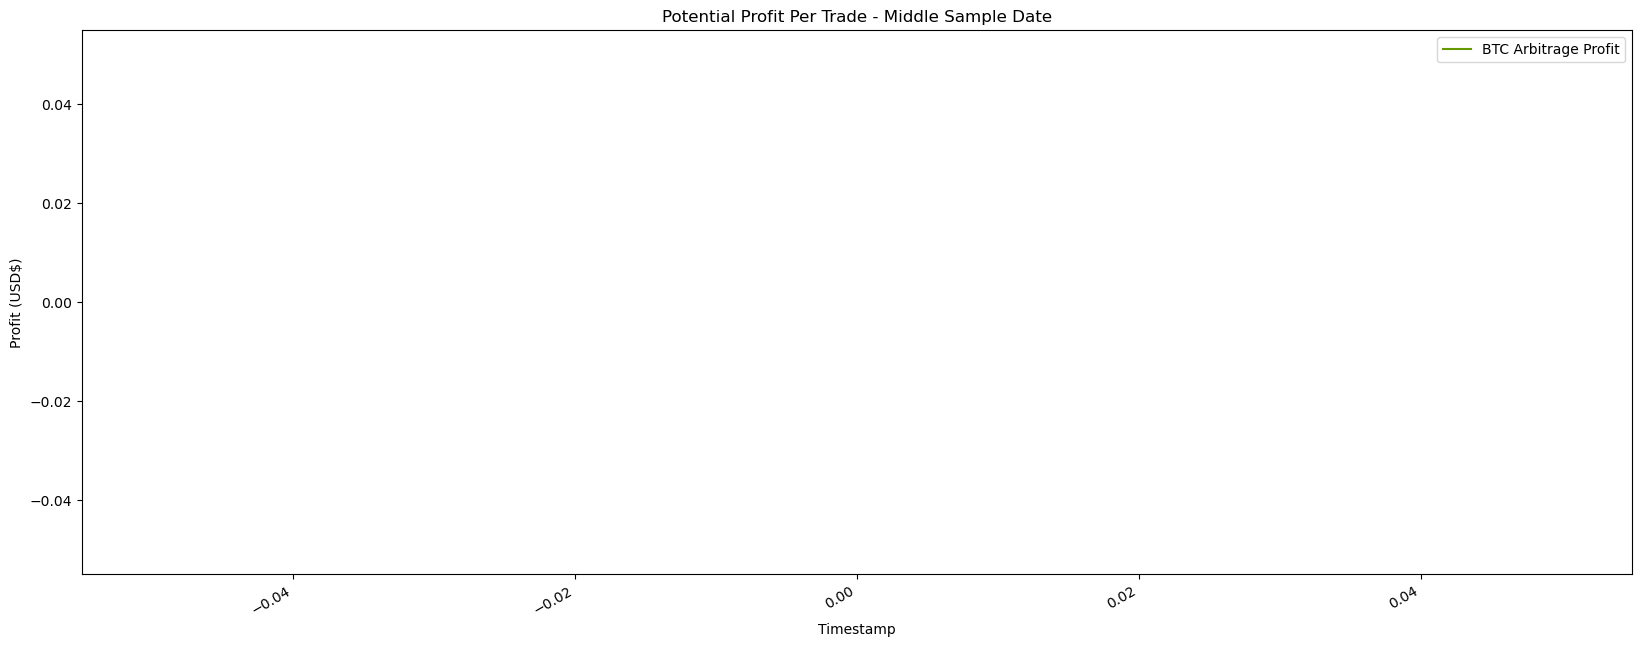

In [46]:
profit_0219.plot(
    figsize=(20, 8),
    legend=True,
    label="BTC Arbitrage Profit",
    ylabel="Profit (USD$)",
    title="Potential Profit Per Trade - Middle Sample Date",
    color="#669900")

<AxesSubplot:title={'center':'Potential Profit Per Trade - Later Sample Date'}, xlabel='Timestamp', ylabel='Profit (USD$)'>

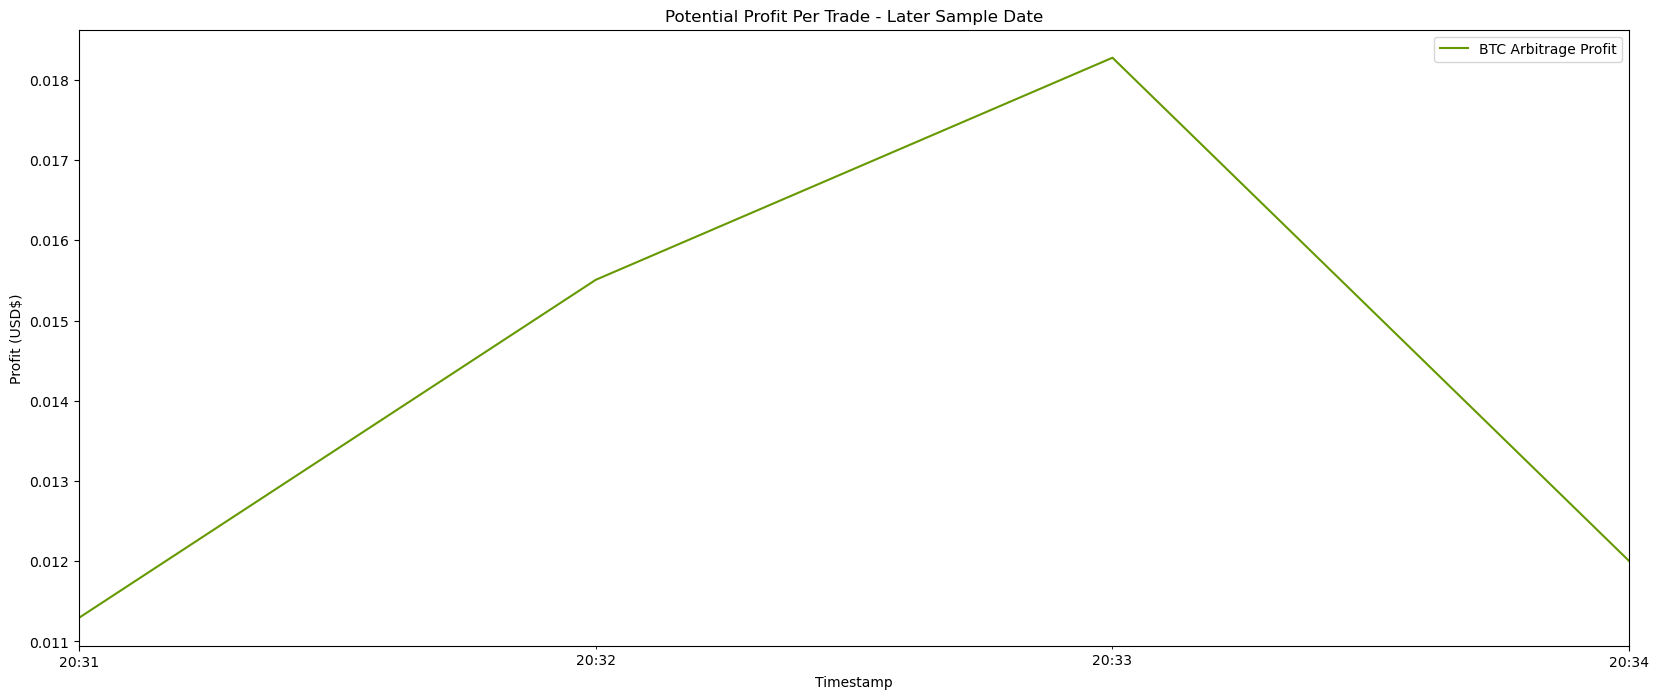

In [47]:
profit_0314.plot(
    figsize=(20,8),
    legend=True,
    label="BTC Arbitrage Profit",
    ylabel="Profit (USD$)",
    title="Potential Profit Per Trade - Later Sample Date",
    color="#669900")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [48]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_0128.sum(), profit_0219.sum(), profit_0314.sum()

(30.592526118932792, 0.0, 0.057082194580561046)

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [49]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_0128 = profit_0128.cumsum()
cumulative_profit_0219 = profit_0219.cumsum()
cumulative_profit_0314 = profit_0314.cumsum()

<AxesSubplot:title={'center':'Cumulative Profit - Early Sample Date'}, xlabel='Timestamp', ylabel='Profit (USD$)'>

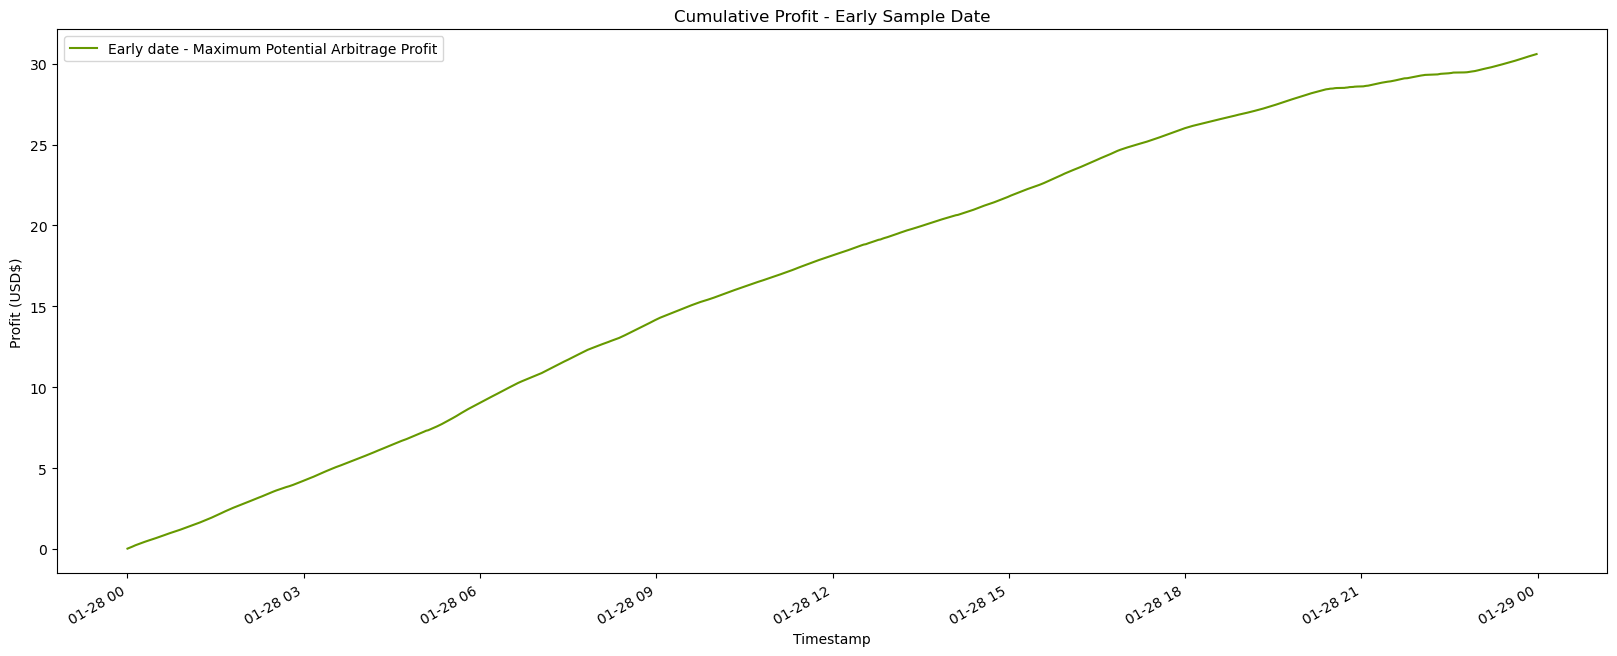

In [50]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_0128.plot(
    figsize=(20, 8),
    legend=True,
    label="Early date - Maximum Potential Arbitrage Profit", 
    ylabel="Profit (USD$)",
    title="Cumulative Profit - Early Sample Date",
    color="#669900")

<AxesSubplot:title={'center':'Cumulative Profit - Middle Sample Date'}, xlabel='Timestamp', ylabel='Profit (USD$)'>

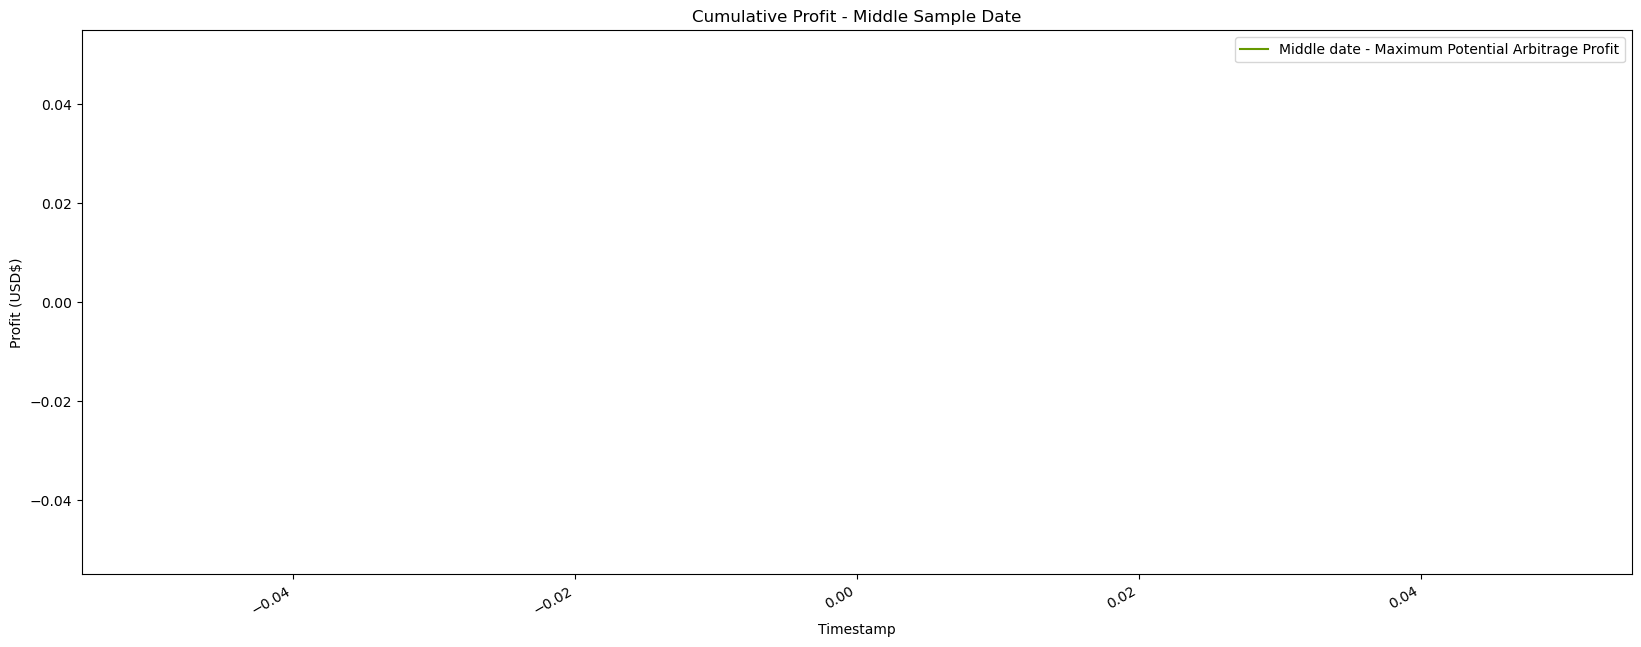

In [51]:
# Plot the cumulative sum of profits for the middle profit per trade DataFrame
cumulative_profit_0219.plot(
    figsize=(20, 8),
    legend=True,
    label="Middle date - Maximum Potential Arbitrage Profit", 
    ylabel="Profit (USD$)",
    title="Cumulative Profit - Middle Sample Date",
    color="#669900")

<AxesSubplot:title={'center':'Cumulative Profit - Later Sample Date'}, xlabel='Timestamp', ylabel='Profit (USD$)'>

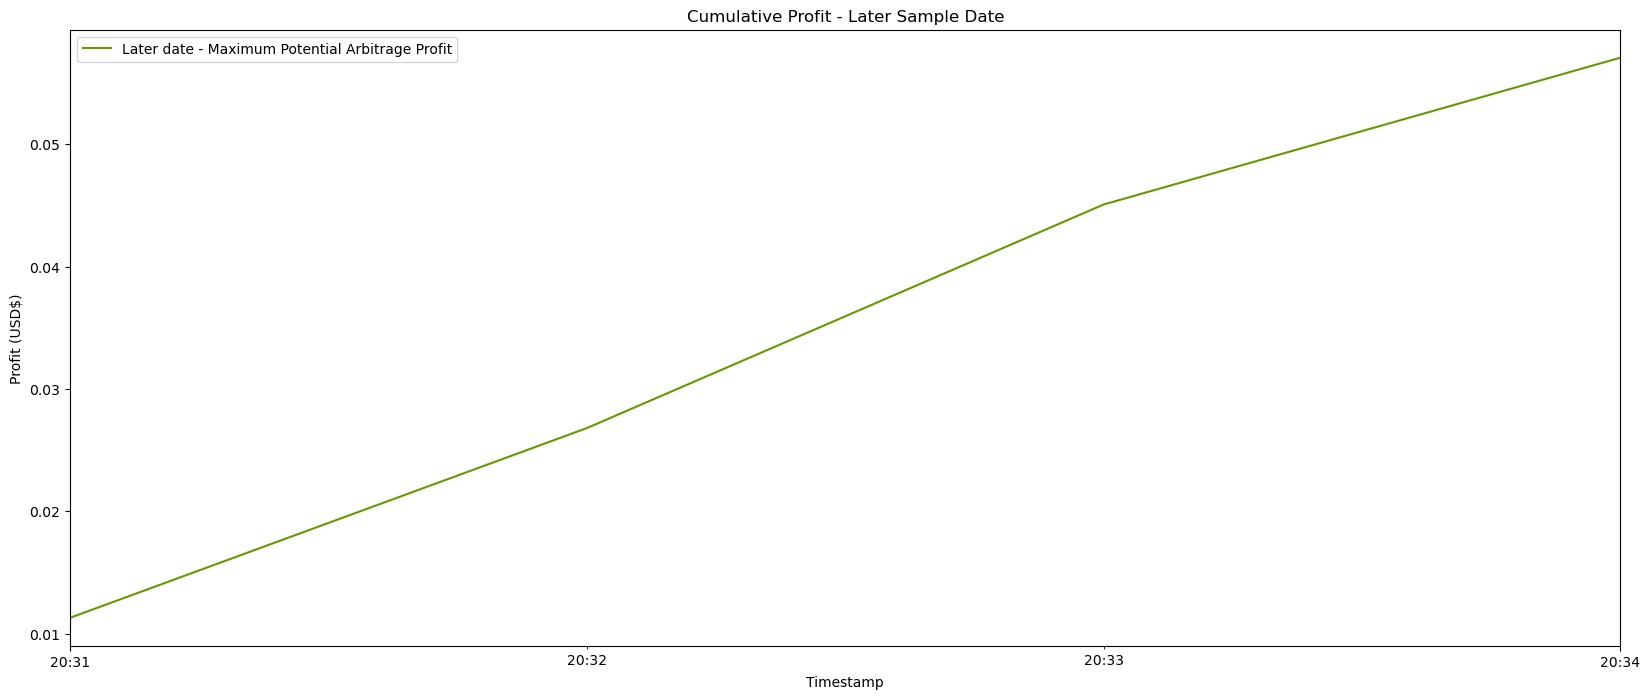

In [52]:
# Plot the cumulative sum of profits for the later profit per trade DataFrame
cumulative_profit_0314.plot(
    figsize=(20, 8),
    legend=True,
    label="Later date - Maximum Potential Arbitrage Profit", 
    ylabel="Profit (USD$)",
    title="Cumulative Profit - Later Sample Date",
    color="#669900"
)

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** Yes, on both early and later sample dates, there are measurable profits and cumulative profits. The data supports the statement that a profit margin from exclusively buying on one exchange and selling on another exchange only works when there is a spread that creates positive arbitrage 

Early Sample: Jan. 28 - most if not all trades were profitable throughout the day
Later Sample: Mar. 14 - during 12:31pm to 12:34pm was the timeframe for profitable trades that day and cumulative profit is measurable.

Feb. 19 - which was is middle sample date, there are instances where a positive trade outcome was possible, however, none of those trades also covered the 1% cost to trade.  Therefore the middle date was not a profitable day for arbitrage of BTC between COIN and BTSP exchanges if buying BTC on COIN exchange and selling on BTSP exchange.  Given this tight trading range, the output for the cumulative graph was empty and the x-axis did not populate valid "Timestamp" values either. 

# EXTRA VISUALS AND COMPARISONS
```
adding a few more visuals to demonstrate observations...
```


<AxesSubplot:title={'center':'BTC Arbitrage - Exhibit A: BTSP and COIN - Feb. 2018'}, xlabel='Timestamp', ylabel='Price (USD$)'>

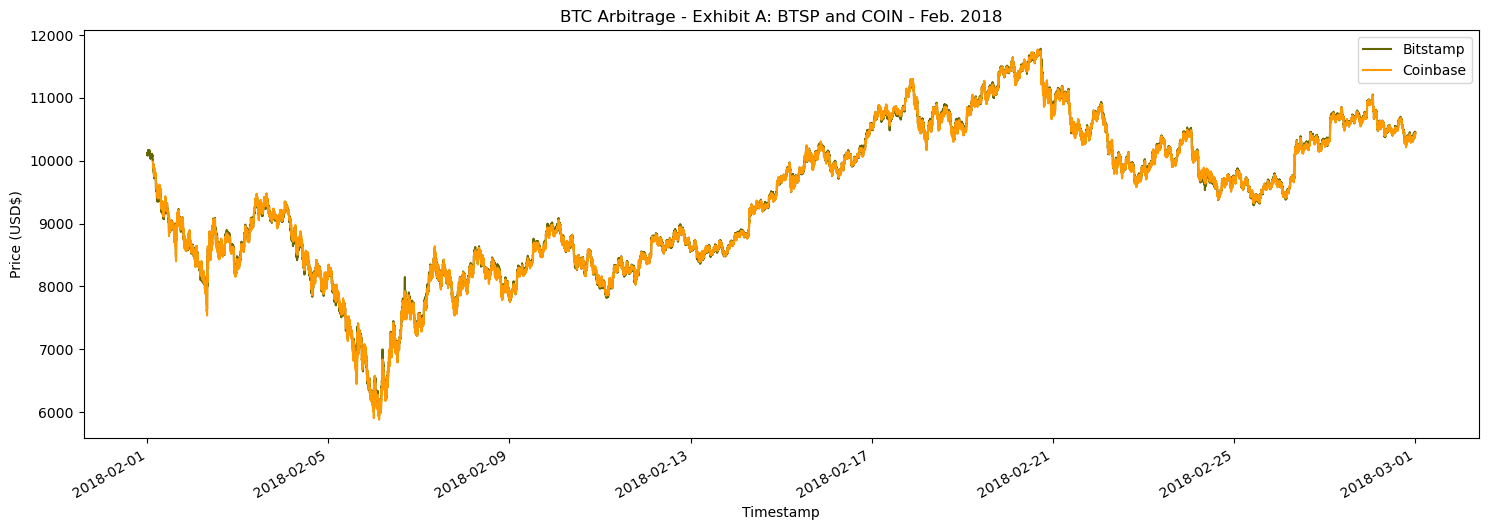

In [53]:
# close up on February visually confirms that trading range was tight

bitstamp['Close'].loc['2018-02-01' : '2018-02-28'].plot(
    figsize=(18,6),
    legend=True,
    ylabel="Price (USD$)",
    title="BTC Arbitrage - Exhibit A: BTSP and COIN - Feb. 2018",
    color="#666600",
    label="Bitstamp"
)
coinbase['Close'].loc['2018-02-01' : '2018-02-28'].plot(
    figsize=(18,6),
    legend=True,
    color="#ff9900",
    label="Coinbase"
)

# The most profitable arbitrage window for Q1 2018 was January 27-29:
### *a visual analysis of the dataframes reveals widespread arbitrage opportunities*.
### 'BUY' *BTC* on COIN exchange, then 'SELL' the *BTC* on the BTSP exchange.

In [72]:
### Jan. 27 to Jan. 29 #### BTSP > COIN

widespread_btsp = btsp.loc[ 
    "2018-01-27":"2018-01-29"
]
widespread_coin = coin.loc[
    "2018-01-27":"2018-01-29"
]

<AxesSubplot:title={'center':'Best 3-day Window of BTC Arbitrage Opportunites - Q1 2018: BTSP and COIN'}, xlabel='Timestamp', ylabel='BTC Price (USD$)'>

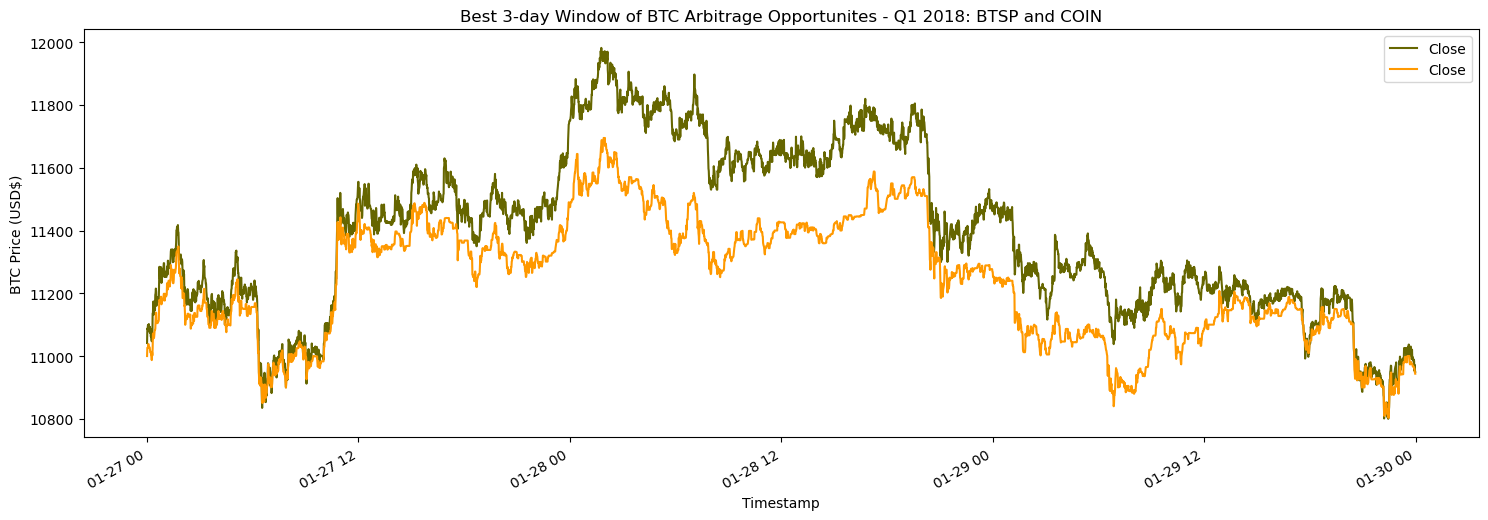

In [73]:
# January 27-29 - largest visual separation for 'BTC' arbitrage 

ax=widespread_btsp.plot(
    legend=True,
    figsize=(18,6),
    ylabel="BTC Price (USD$)",
    title="Best 3-day Window of BTC Arbitrage Opportunites - Q1 2018: BTSP and COIN",
    color="#666600", 
    label="BTSP",
    )
widespread_coin.plot(
    ax=ax,
    legend=True,
    color="#ff9900",
    label="COIN"
    )

In [74]:
# Using the date range that you have selected, calculate the arbitrage spread for 'widespread_arb_window'
# by subtracting the lower-priced exchange from the higher-priced one

# BTSP > COIN - for BTC
widespread_arb_window = widespread_btsp['Close'] - widespread_coin['Close']

In [75]:
widespread_arb_window

Timestamp
2018-01-27 00:00:00    41.51
2018-01-27 00:01:00    61.11
2018-01-27 00:02:00    58.70
2018-01-27 00:03:00    71.99
2018-01-27 00:04:00    58.66
                       ...  
2018-01-29 23:55:00    23.62
2018-01-29 23:56:00    -7.29
2018-01-29 23:57:00    18.31
2018-01-29 23:58:00     2.39
2018-01-29 23:59:00     5.92
Name: Close, Length: 4320, dtype: float64

<AxesSubplot:title={'center':'Maximum Profit Opportunity Window - BTC Arbitrage Spread: Jan.27-29, 2018'}>

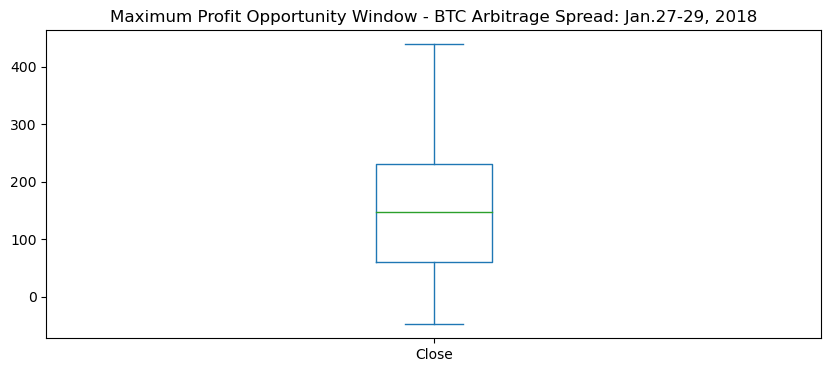

In [76]:
# Visualize the arbitrage spread from late in the dataset in a box plot
widespread_arb_window.plot(
    kind="box",
    legend=True,
    figsize=(10,4),
    title="Maximum Profit Opportunity Window - BTC Arbitrage Spread: Jan.27-29, 2018"
)

In [77]:
widespread_return = widespread_arb_window[widespread_arb_window > 0] / widespread_coin['Close']

In [78]:
widespread_return.head(), widespread_return.tail()

(Timestamp
 2018-01-27 00:00:00    0.003774
 2018-01-27 00:01:00    0.005542
 2018-01-27 00:02:00    0.005324
 2018-01-27 00:03:00    0.006529
 2018-01-27 00:04:00    0.005314
 Name: Close, dtype: float64,
 Timestamp
 2018-01-29 23:55:00    0.002155
 2018-01-29 23:56:00         NaN
 2018-01-29 23:57:00    0.001672
 2018-01-29 23:58:00    0.000218
 2018-01-29 23:59:00    0.000541
 Name: Close, dtype: float64)

In [79]:
widespread_return.describe()

count    4211.000000
mean        0.013612
std         0.008529
min         0.000016
25%         0.005638
50%         0.013463
75%         0.020471
max         0.038510
Name: Close, dtype: float64

In [80]:
widespread_profitable_trades = widespread_return[widespread_return > .01]

In [81]:
widespread_profitable_trades

Timestamp
2018-01-27 00:19:00    0.010039
2018-01-27 03:12:00    0.010372
2018-01-27 12:16:00    0.010346
2018-01-27 12:17:00    0.010271
2018-01-27 12:18:00    0.011292
                         ...   
2018-01-29 12:24:00    0.010499
2018-01-29 12:31:00    0.011571
2018-01-29 12:33:00    0.010985
2018-01-29 12:37:00    0.010021
2018-01-29 12:39:00    0.010136
Name: Close, Length: 2502, dtype: float64

In [82]:
widespread_profitable_trades.describe()

count    2502.000000
mean        0.019555
std         0.005562
min         0.010006
25%         0.015271
50%         0.019463
75%         0.022950
max         0.038510
Name: Close, dtype: float64

In [83]:
widespread_profits = widespread_profitable_trades * widespread_coin['Close']

In [84]:
widespread_profits = widespread_profits.dropna()

In [85]:
widespread_profits.describe()

count    2502.000000
mean      221.462114
std        64.338823
min       110.680000
25%       171.045000
50%       218.780000
75%       261.090000
max       439.010000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Cumulative Profit - Jan.27 to Jan. 29'}, xlabel='Timestamp', ylabel='Profit (USD$)'>

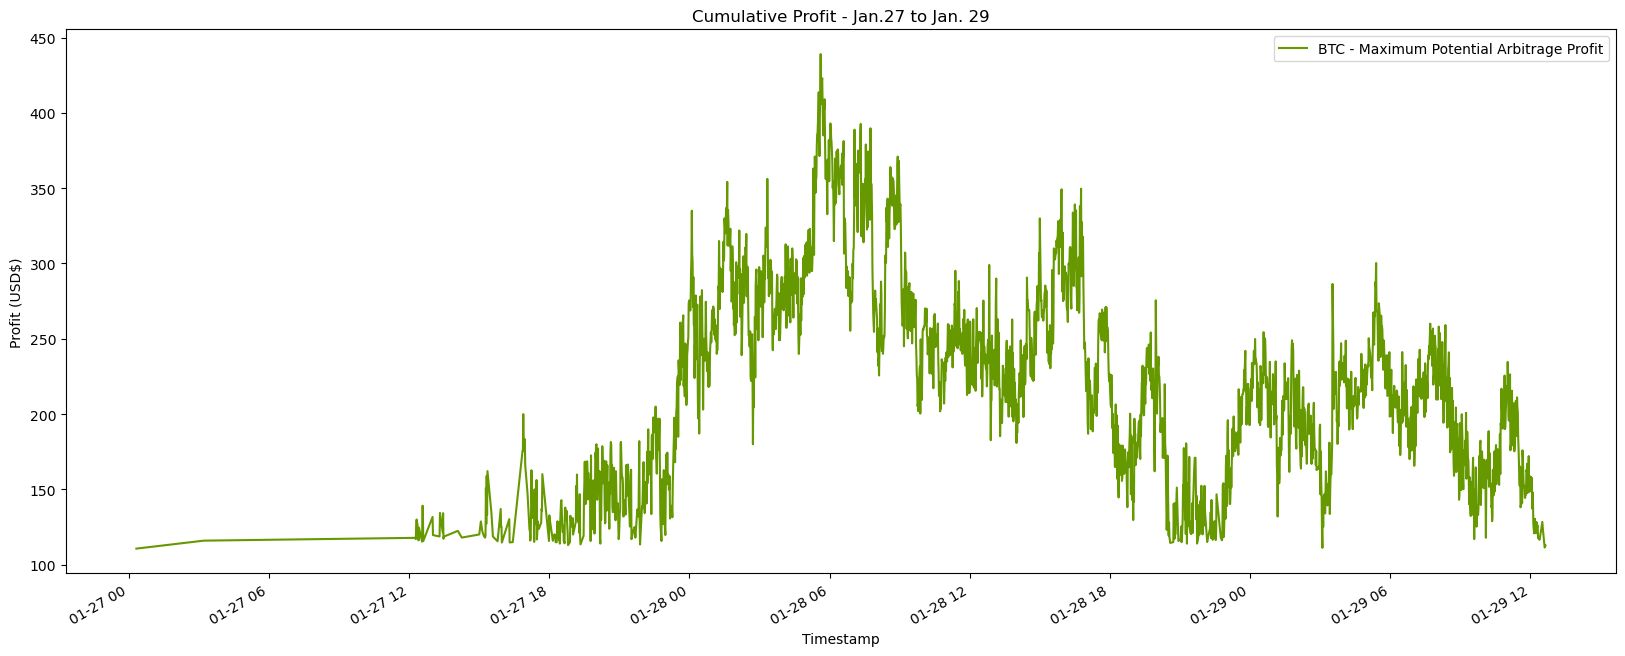

In [86]:
# Plot results for the 'widespread_profits' 
widespread_profits.plot(
    figsize=(20, 8),
    legend=True,
    label="BTC - Maximum Potential Arbitrage Profit", 
    ylabel="Profit (USD$)",
    title="Cumulative Profit - Jan.27 to Jan. 29",
    color="#669900")

In [87]:
widespread_profits.sum()

554098.2100000001

In [88]:
cumulative_widespread_profit = widespread_profits.cumsum()

<AxesSubplot:title={'center':'Cumulative Profit - Jan.27 to Jan. 29'}, xlabel='Timestamp', ylabel='Profit (USD$)'>

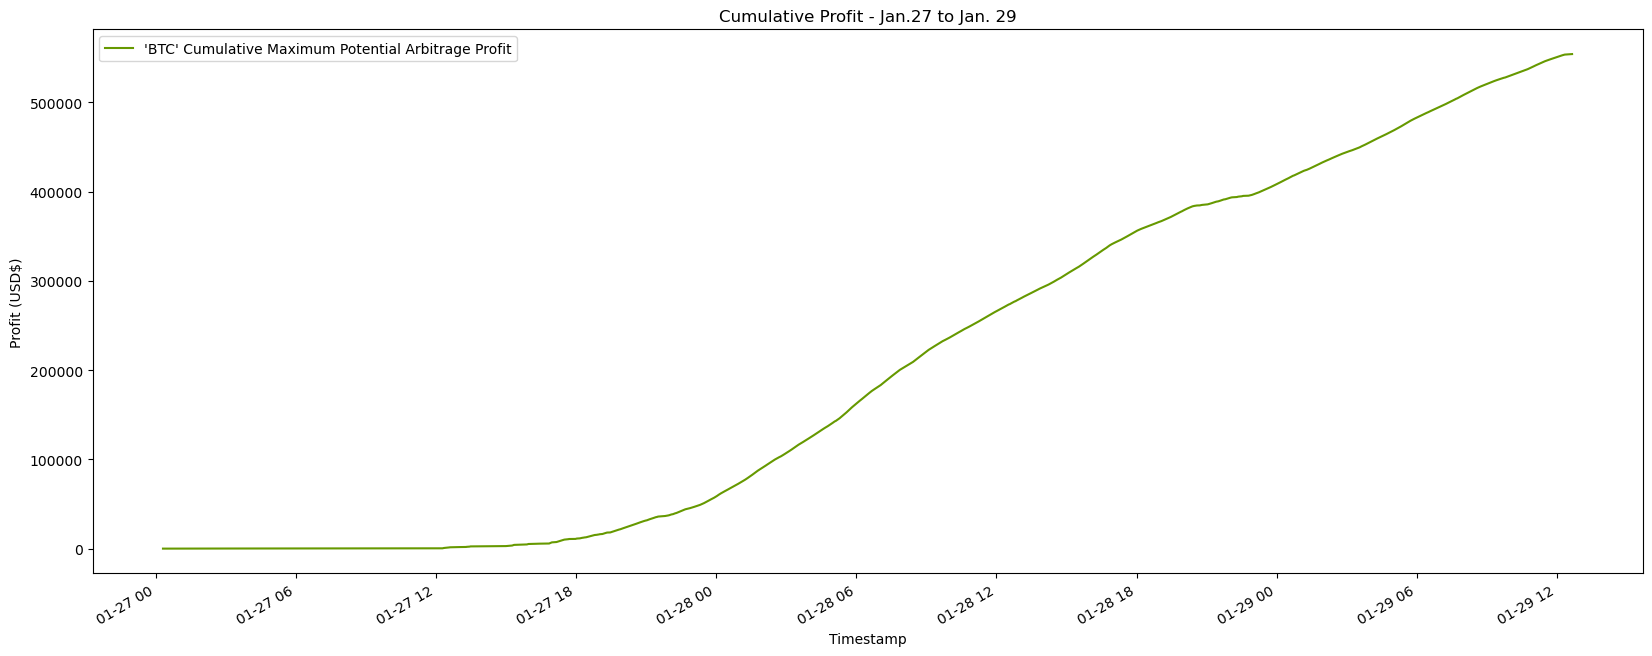

In [89]:
cumulative_widespread_profit.plot(
    figsize=(20, 8),
    legend=True,
    label="'BTC' Cumulative Maximum Potential Arbitrage Profit", 
    ylabel="Profit (USD$)", 
    title="Cumulative Profit - Jan.27 to Jan. 29",
    color="#669900")